# Lecture 1 Statistical Distributions
## Part 9: Mixture Modeling

**Just like "Lightning Cutter (雷切 らいきり Raikiri)**

<img src="Jutsu_Raikiri_Kakashi.jpg" width="600">

#### Example 1 Mixture Model Basics

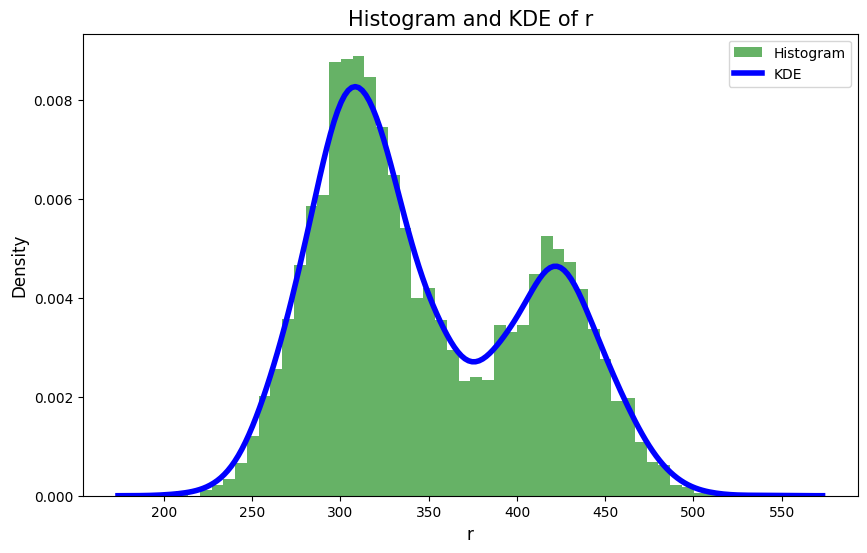

Results: [-0.14540621] [0.05247241] [305.63781362] [421.5741724] [0.61299578]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Given parameters
mu_1 = 310
sigma1 = 30
mu_2 = 420
sigma2 = 30
p = 0.65
T = 5000

# Generate the data for r
r = np.zeros(T)
for t in range(T):
    eps1 = np.random.normal(0,1,1)
    eps2 = np.random.normal(0,1,1)
    r1 = mu_1 + sigma1 * eps1
    r2 = mu_2 + sigma2 * eps2
    u = np.random.uniform(0,1,1)
    r[t] = r1*(u <= p)+r2*(u > p)

# Plotting the histogram of r
plt.figure(figsize=(10,6))
plt.hist(r, bins=50, density=True, alpha=0.6, color='green', label="Histogram")

# Overlaying the distribution using seaborn kdeplot
sns.kdeplot(r, color='blue', label="KDE", lw=4)

# Adding plot labels and legend
plt.title("Histogram and KDE of r", fontsize=15)
plt.xlabel("r", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()
print("Results:", eps1, eps2, r1, r2, u)

#### Example 2 Mixture Model Application

[*********************100%***********************]  1 of 1 completed


sample mean: $95.51982847849528
sample standard deviation: $23.74564957071622


<Figure size 1000x600 with 0 Axes>

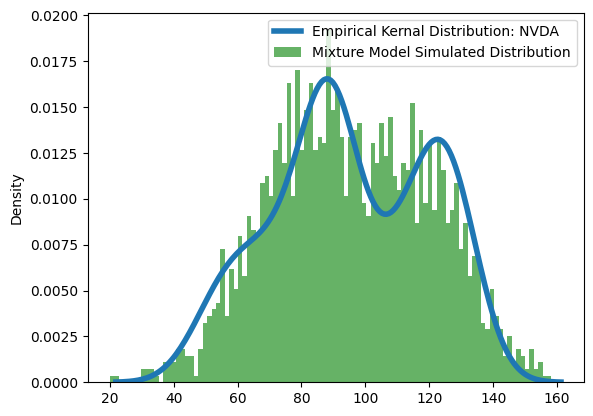

In [14]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import yfinance as yf

start_date = datetime(2024,1,1)
end_date = datetime(2024,8,31)

stock_symbol = "NVDA"
stocks = yf.download(stock_symbol,start_date ,end_date)
stocks['Adj Close'].describe() # summary statistics
X = stocks['Adj Close'].values
mu = np.mean(X)
se = np.std(X)
print(f"sample mean: ${mu}")
print(f"sample standard deviation: ${se}")

# Given parameters
mu_1 = 85 # mean value, the the fist peak of the distribution
sigma1 = 20 # this is the standard deviation, and also the risk
mu_2 = 122 # mean value, the the second peak of the distribution
sigma2 = 15 # this is the standard deviation, and also the risk
p = 0.7 # probability, the weight of the first peak
T = 2000 # do not change this, it is the number of data points

# Generate the data for r
r = np.zeros(T)
for t in range(T):
    eps1 = np.random.normal(0,1,1)
    eps2 = np.random.normal(0,1,1)
    r1 = mu_1 + sigma1 * eps1
    r2 = mu_2 + sigma2 * eps2
    u = np.random.uniform(0,1,1)
    r[t] = r1*(u <= p)+r2*(u > p)

# Plotting the histogram of r
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4)
plt.hist(r, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
ax.legend([f'Empirical Kernal Distribution: {stock_symbol}', 'Mixture Model Simulated Distribution'])